<a href="https://colab.research.google.com/github/RichardHarwood/root_hairs_rhizosphere_soil/blob/main/Pore_Network_Paper_R_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=fcb134f15616f33db5b3087359720b2a1c5ea13c08e8e4df9122e7b044b2f251
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [2]:
#DOWNLOAD DATA TO COLAB SESSION - NOTE THIS IS TEMP, I WOULD ALWAYS SAVE TO GOOGLE DRIVE BUT THAT ADDS ANOTHER STEP
import wget
wget.download("https://zenodo.org/records/13958667/files/"+"2-3_enhanced.tif.h5"+"?download=1", out='2-3_enhanced.tif.h5')


'2-3_enhanced.tif.h5'

In [1]:
%load_ext rpy2.ipython

In [ ]:

%%R

install.packages("ggpubr")

In [ ]:
%%R
install.packages("ggpubr")
library(tidyverse)
library(ggpubr)
my_theme    <- theme(axis.text.x = element_text( color="black", size=30, angle=0),
                     panel.border = element_rect(fill = "NA", colour = "black", size = 2),
                     panel.background = element_blank(),
                     plot.title = element_text(size=37),
                     axis.text.y = element_text( color="black", size=30),
                     axis.title.y = element_text(color="black", size=25),
                     legend.position = "none")

In [ ]:
%%R
custom_colors <- c("black", "red" )

In [ ]:
 %%R
pore_regions_df_url = ('/content/drive/MyDrive/PORE_PAPER_COLAB/COLLATED_CSV/region_df.csv')
pore_regions_df = read.csv(pore_regions_df_url)
pore_regions_df$plant<-as.factor(pore_regions_df$plant)
pore_regions_df$ring<-as.factor(pore_regions_df$ring)
pore_regions_df<-pore_regions_df %>% filter(!grepl('W1_', plant  ))

 pore_regions_df<-pore_regions_df %>%
  mutate()%>%
  mutate(plant = case_when(plant=="W16_"~"Wheat",
                           plant=="BALDY"~"Barley (brb)",
                           plant=="BARLEYWT"~"Barley (wt)"))  %>%
  mutate(ring = case_when(ring=="1mm"~"Rhizosphere",
                           ring=="bulk_soil"~"Bulk Soil"))

 pore_regions<-pore_regions_df %>%
  group_by(IMAGE_ID,plant, ring) %>%
  mutate(region_volume_mm = region_volume/1000000000) %>%
  summarise(pore_count  = length(region_volume),
            pore_volume_total  = sum(region_volume_mm, na.rm=TRUE),
            average_region_size_median = median(region_volume_mm, na.rm=TRUE),
            average_region_size_mean = mean(region_volume_mm, na.rm=TRUE)) %>%
  mutate(pore_number_over_volume=pore_count/pore_volume_total)

`summarise()` has grouped output by 'IMAGE_ID', 'plant'. You can override using
the `.groups` argument.


In [ ]:
#  %%R
# pore_regions_df

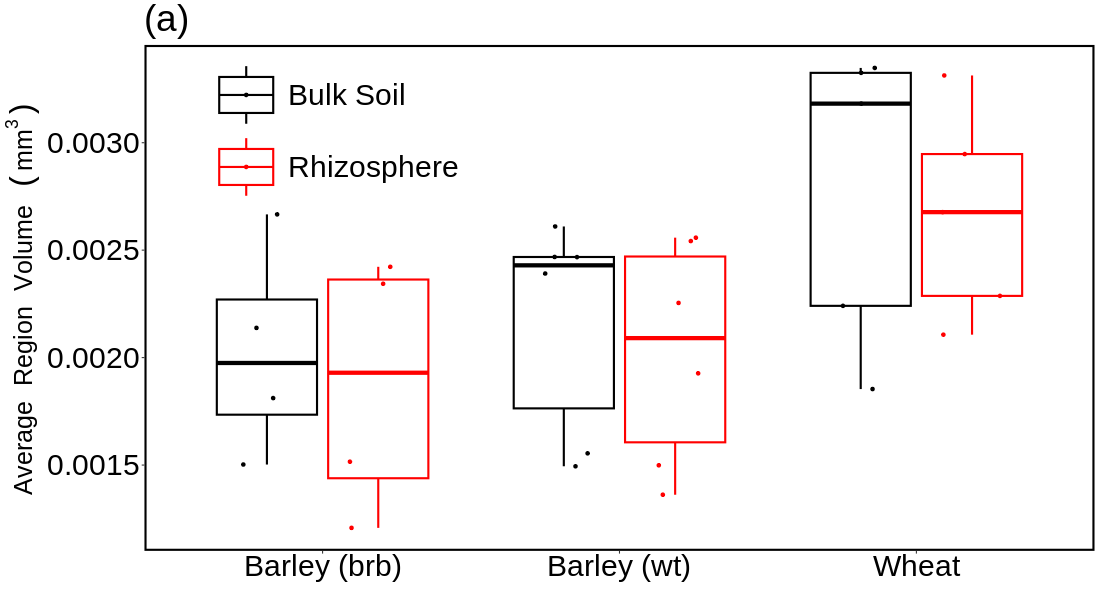

In [ ]:
 %%R  -w 1100 -h 600 -u px
pore_regions_gg<-pore_regions %>%
  ggplot(aes(x=plant, y=average_region_size_mean))+
  ggtitle(("(a)"))+
  geom_boxplot(aes(x=as.factor(plant), y=average_region_size_mean,color=as.factor(ring)),outlier.shape = NA, size=1)+
  geom_point(aes(color= ring), alpha = 1,
             position = position_jitterdodge(jitter.width = 0.2))+
  labs(y=(bquote(Average~Region~Volume~(mm^3))), x = "",element_text(size = 6))+
  my_theme+
  theme(legend.key.size = unit(5,"line"))+
  scale_color_manual(values = custom_colors)+
  theme(legend.text = element_text(size=30))+
  theme(legend.position=c(.2,.83))+
  theme(legend.title=element_blank());pore_regions_gg

In [ ]:
%%R
pore_volume_stat=compare_means(average_region_size_mean ~ plant, data = pore_regions, group.by="ring");pore_volume_stat

Adding missing grouping variables: `IMAGE_ID`
# A tibble: 6 × 9
  ring        .y.            group1 group2      p p.adj p.format p.signif method
  <chr>       <chr>          <chr>  <chr>   <dbl> <dbl> <chr>    <chr>    <chr> 
1 Bulk Soil   average_regio… Wheat  Barle… 0.111   0.56 0.111    ns       Wilco…
2 Bulk Soil   average_regio… Wheat  Barle… 0.247   0.76 0.247    ns       Wilco…
3 Bulk Soil   average_regio… Barle… Barle… 0.914   1    0.914    ns       Wilco…
4 Rhizosphere average_regio… Wheat  Barle… 0.190   0.76 0.190    ns       Wilco…
5 Rhizosphere average_regio… Wheat  Barle… 0.0823  0.49 0.082    ns       Wilco…
6 Rhizosphere average_regio… Barle… Barle… 0.762   1    0.762    ns       Wilco…


In [ ]:
%%R
pore_volume_stat_ring=compare_means(average_region_size_mean ~ ring, data = pore_regions, group.by="plant");pore_volume_stat_ring

Adding missing grouping variables: `IMAGE_ID`
# A tibble: 3 × 9
  plant        .y.            group1 group2     p p.adj p.format p.signif method
  <chr>        <chr>          <chr>  <chr>  <dbl> <dbl> <chr>    <chr>    <chr> 
1 Wheat        average_regio… Bulk … Rhizo… 0.690     1 0.69     ns       Wilco…
2 Barley (brb) average_regio… Bulk … Rhizo… 0.886     1 0.89     ns       Wilco…
3 Barley (wt)  average_regio… Bulk … Rhizo… 0.699     1 0.70     ns       Wilco…
